# Models Training and Evaluation - News


## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import csv
import re
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import itertools

[nltk_data] Downloading package punkt to /home/riccardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Importing the dataset
file_path = "subset_df_topic_for_eng_models.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,Article Body,Article Topic 1,Media Language
0,Exclusive: Keir Starmer says Brussels has ‘hig...,politics,English
1,Voting is under way in the 2017 June general e...,politics,English
2,Get celebs updates directly to your inbox + Su...,culture,English
3,This week it was confirmed that her marriage t...,showbiz-celebrity,English
4,Spike Lee’s latest film is about a black cop w...,culture,English


In [4]:
df = df.rename(columns={"Article Body":"text",
                   "Article Topic 1":"label"})

In [5]:
# Defining a function to perform data cleaning
def clean_text(text):
    # 1) Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # 2) Getting rid of numbers
    text = re.sub(r'\d+', '', text)
    # 3) Removing words which have 2 or less letters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    # 4) Making text lowercase
    return text.lower()

# Applying the function to the text column
df["text"] = df["text"].apply(clean_text)

In [6]:
df.head()

,text,label,Media Language
0,exclusive keir starmer says brussels has high ...,politics,English
1,voting under way the june general election acr...,politics,English
2,get celebs updates directly your inbox subscri...,culture,English
3,this week was confirmed that her marriage dan ...,showbiz-celebrity,English
4,spike lees latest film about black cop who inf...,culture,English


## Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = df["text"]
y = df["label"]
vectorizer = CountVectorizer(stop_words='english')
X_cv = vectorizer.fit_transform(X)

# Split the data into training validatoon and test sets (70-15-15)

X_train, _texts, y_train, _labels = train_test_split(X_cv, y,
                                                    random_state=42, test_size=0.3)
X_test, _, y_test, _ = train_test_split(_texts, _labels,
                                                    random_state=42, test_size=0.5)

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(solver='sag', max_iter=100)

# training the model
model_lr.fit(X_train, y_train)

# making predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# model evaluation
print(classification_report(y_test, y_pred_lr))

                   precision    recall  f1-score   support

          culture       0.88      0.89      0.89       355
  economy-finance       0.96      0.96      0.96       342
         politics       0.95      0.96      0.95       391
showbiz-celebrity       0.93      0.92      0.92       402
            sport       0.98      0.97      0.97       392

         accuracy                           0.94      1882
        macro avg       0.94      0.94      0.94      1882
     weighted avg       0.94      0.94      0.94      1882



/home/riccardo/miniconda3/envs/alstom/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


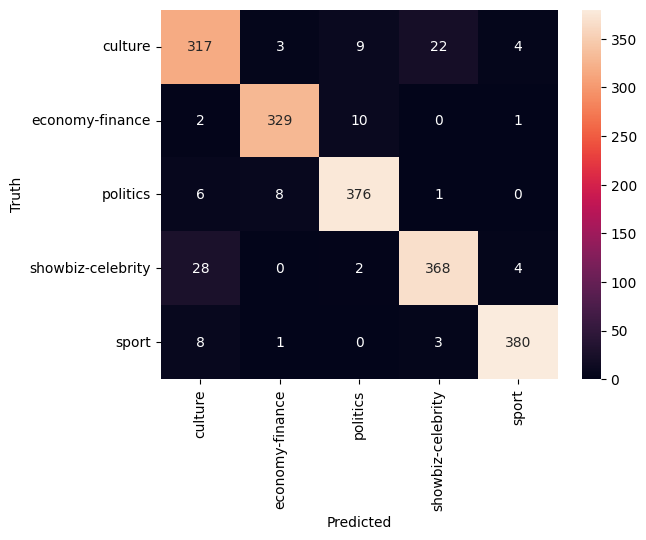

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# creating a heatmap
plt.figure()
label_names = list(model_lr.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = label_names, yticklabels = label_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [10]:
# Geting the coefficients from the trained linear model
coefficients = model_lr.coef_[0]

# Geting the list of words (features) from the CountVectorizer
words = vectorizer.get_feature_names_out()

# Creating a list of (word, coefficient) pairs and sort them based on the absolute coefficient values
word_coefficient_pairs = list(zip(words, coefficients))
word_coefficient_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

# Printing the top 30 most important words
print("Top 30 Most Important Words:")
for word, coefficient in word_coefficient_pairs[:30]:
    print(f"{word}: {coefficient}")

Top 30 Most Important Words:
image: 0.36410831034731983
art: 0.3423983217762203
subscribe: 0.3348914276465513
pictured: -0.31141392902507264
theres: 0.30564494901459827
film: 0.29050136523899106
brexit: -0.28060494075550874
xbox: 0.27601850467671996
tax: -0.26234599633330935
photograph: 0.25081596561932457
itv: 0.24476747579115535
yearold: -0.2388826806496563
book: 0.2388129097700039
movie: 0.23714352133306987
fans: 0.2288419614609349
pokemon: 0.22420572835711397
album: 0.22103669911528567
festival: 0.2138575469448121
wars: 0.21124695852741057
music: 0.21114246523380173
fortnite: 0.2110676801548658
release: 0.20992013561286849
pinterest: 0.20616535295059424
celebs: 0.2024376093010779
later: 0.19560712313287523
nintendo: 0.18845289368799237
subscribing: 0.1865016434574701
new: 0.1837287166039785
united: -0.18265141245603844
irish: 0.1792793673101199


### SVM

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm_model = LinearSVC()

svm_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Model evaluation
print("Support Vector Machine (SVM) Results:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Results:
                   precision    recall  f1-score   support

          culture       0.85      0.89      0.87       355
  economy-finance       0.95      0.97      0.96       342
         politics       0.95      0.94      0.94       391
showbiz-celebrity       0.94      0.89      0.92       402
            sport       0.96      0.98      0.97       392

         accuracy                           0.93      1882
        macro avg       0.93      0.93      0.93      1882
     weighted avg       0.93      0.93      0.93      1882



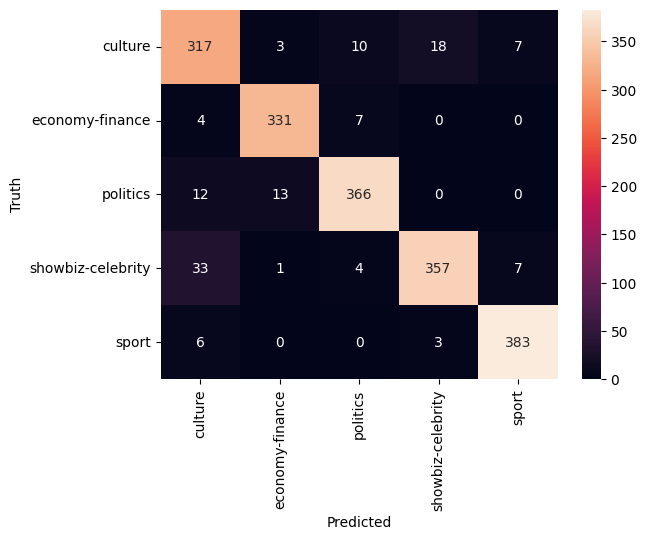

In [12]:
# computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# creating a heatmap
plt.figure()
label_names = list(svm_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = label_names, yticklabels = label_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [13]:
# Geting the coefficients from the trained linear model
coefficients = svm_model.coef_[0]

# Geting the list of words (features) from the CountVectorizer
words = vectorizer.get_feature_names_out()

# Creating a list of (word, coefficient) pairs and sort them based on the absolute coefficient values
word_coefficient_pairs = list(zip(words, coefficients))
word_coefficient_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

# Printing the top 30 most important words
print("Top 30 Most Important Words:")
for word, coefficient in word_coefficient_pairs[:30]:
    print(f"{word}: {coefficient}")

Top 30 Most Important Words:
pictured: -0.37950981261669403
theres: 0.26028667036563813
brexit: -0.24947174803688799
alice: 0.2485809018740054
art: 0.2478866209568241
photograph: 0.23327594918356562
subscribe: 0.2310620324775207
battle: 0.2268575262621717
occasion: 0.22122325473222468
mps: -0.2201171337070961
celebs: 0.21445181180485806
licence: 0.2068473687147818
united: -0.20516249896903097
jedi: 0.20483674569183735
minister: -0.20369771495384323
sheila: 0.19932737217810484
weinstein: 0.19493072247374335
bafta: 0.18992708064752992
yearold: -0.1874983599877627
atim: 0.18747648396333613
fear: 0.18553470561535604
blockbuster: 0.18192758335149217
xbox: 0.18189925880353103
chelsea: -0.17849546976151565
england: -0.17756268262417005
politics: -0.1770821368547676
conservative: -0.17673432141456172
honestly: 0.17408797051587047
rolling: -0.1736636363220187
museum: 0.17166901861988218


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creating and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Results:
                   precision    recall  f1-score   support

          culture       0.85      0.88      0.86       355
  economy-finance       0.94      0.95      0.95       342
         politics       0.93      0.96      0.94       391
showbiz-celebrity       0.93      0.89      0.91       402
            sport       0.97      0.95      0.96       392

         accuracy                           0.93      1882
        macro avg       0.93      0.93      0.93      1882
     weighted avg       0.93      0.93      0.93      1882



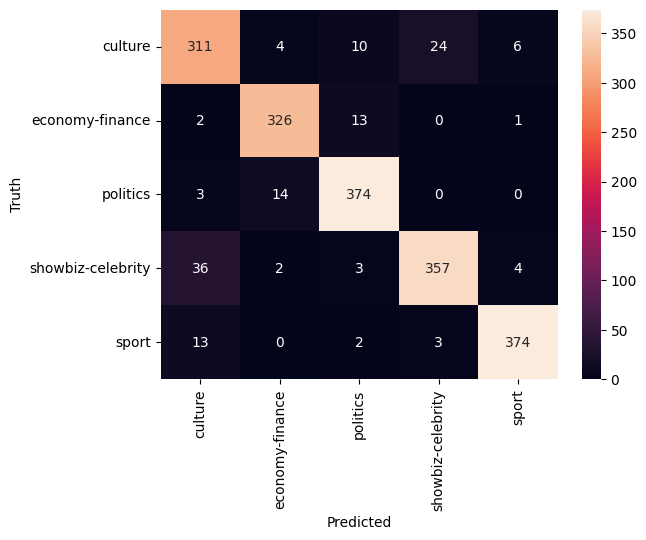

In [15]:
# computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# creating a heatmap
plt.figure()
label_names = list(rf_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = label_names, yticklabels = label_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [16]:
# Geting the feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Geting the list of words (features) from the CountVectorizer
words = vectorizer.get_feature_names_out()

# Creating a list of (word, importance) pairs and sort them based on the importance values
word_importance_pairs = list(zip(words, feature_importances))
word_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printing the top 30 most important words
print("Top 30 Most Important Words:")
for word, importance in word_importance_pairs[:30]:
    print(f"{word}: {importance}")

Top 30 Most Important Words:
star: 0.006464472920675437
investors: 0.005676600086306993
league: 0.005421905769621379
brexit: 0.0051880827546933305
party: 0.0047190321053427065
minister: 0.004290833055940239
club: 0.0040128308818281385
money: 0.00390240419450189
shes: 0.003798658027804088
investment: 0.003739808383158858
subscribe: 0.003645879577460236
theresa: 0.0036113695507515335
prime: 0.003606817817061663
instagram: 0.003517398278558345
mps: 0.0034108432400209525
season: 0.0033553332481952134
fans: 0.0033456166664517077
labour: 0.0033212322056379536
market: 0.003318062239584252
tax: 0.003163155151168257
fund: 0.0031468972070818006
election: 0.0031361454741550645
johnson: 0.0031137651259380344
government: 0.00300871545455191
premier: 0.002991613952732959
actress: 0.0029578941147150456
champions: 0.0029091132274995024
stock: 0.0028869744577069757
player: 0.0028713512659514604
win: 0.002860053073712183


### Multinomial Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Creating and training the Naive Bayes classifier with sample weights
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Model evaluation
print("Multinomial Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Results:
                   precision    recall  f1-score   support

          culture       0.85      0.88      0.86       355
  economy-finance       0.95      0.95      0.95       342
         politics       0.93      0.93      0.93       391
showbiz-celebrity       0.92      0.92      0.92       402
            sport       0.98      0.96      0.97       392

         accuracy                           0.93      1882
        macro avg       0.93      0.93      0.93      1882
     weighted avg       0.93      0.93      0.93      1882



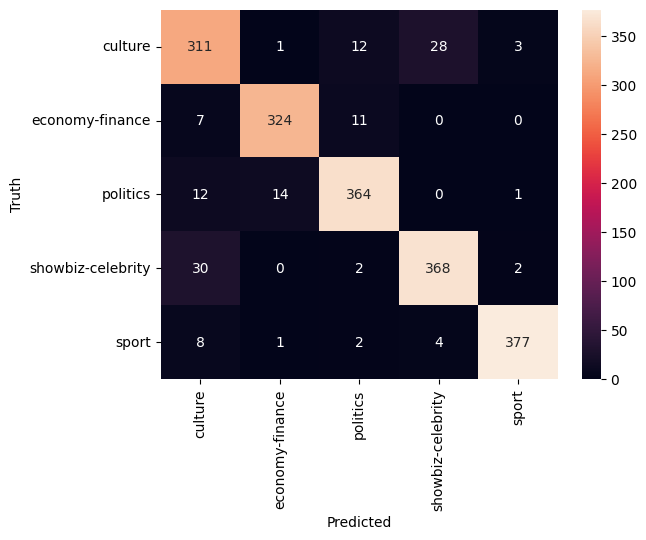

In [18]:
# computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# creating a heatmap
plt.figure()
label_names = list(nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = label_names, yticklabels = label_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Metamodel: voting classifier

In [19]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('logistic_regression', model_lr),
        ('support_vector_machines', svm_model),
        ('random_forest', rf_model),
        ('multinomial_naive_bayes', nb_model),
    ],
    voting='hard' 
)

voting_clf.fit(X_train, y_train)

/home/riccardo/miniconda3/envs/alstom/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(solver='sag')),
                             ('support_vector_machines', LinearSVC()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('multinomial_naive_bayes', MultinomialNB())])

In [20]:
# making predictions on the test data
y_pred_voting = voting_clf.predict(X_test)

# model evaluation
print(classification_report(y_test, y_pred_voting))

                   precision    recall  f1-score   support

          culture       0.86      0.93      0.89       355
  economy-finance       0.96      0.97      0.97       342
         politics       0.95      0.95      0.95       391
showbiz-celebrity       0.96      0.90      0.93       402
            sport       0.99      0.97      0.98       392

         accuracy                           0.94      1882
        macro avg       0.94      0.94      0.94      1882
     weighted avg       0.95      0.94      0.94      1882



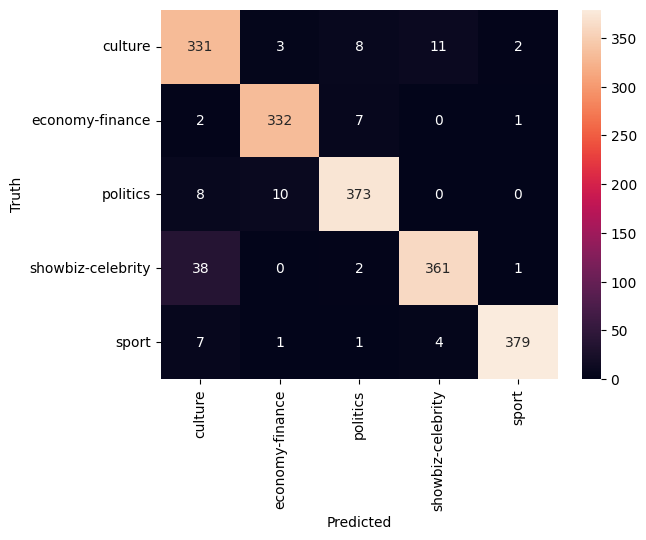

In [21]:
# computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)

# creating a heatmap
plt.figure()
label_names = list(voting_clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = label_names, yticklabels = label_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Saving the Metamodel

In [22]:
from joblib import dump, load
dump(voting_clf, 'metamodel_news.pkl')
# use metamodel = joblib.load('metamodel.pkl') to reuse the trained model

['metamodel_news.pkl']